In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qcodes as qc
from numpy.random import randint
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.data_export import get_data_by_id
from itertools import product
import time

from optimization_from_completed_data import get_params_dict, get_measurement_from_data, optimize_from_runid, try_many
from select_next_coordinates import get_neighbours

/anaconda3/envs/qcodes/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
variable_params, measured_params = get_params_dict(6)

for param in variable_params:
    param['max_step'] = int(len(param['values']) / 3)
    
start_coordinates = [randint(0, len(param['values'])) for param in variable_params]

In [3]:
start_coordinates

[9, 56]

In [4]:
get_measurement_from_data(variable_params, measured_params, start_coordinates)

0.0100011220259899

In [5]:
get_neighbours(start_coordinates, variable_params)

[(0, 105), (0, 7), (18, 105), (18, 7)]

In [14]:
def stopping_condition(params, best_candidate):
    if get_measurement_from_data(variable_params, measured_params, best_candidate) <= 9.65e-3:
        return True
    else:
        return False
    
def cost_val(variable_params, measured_params, indicies):
    measured_value = get_measurement_from_data(variable_params, measured_params, indicies)
    return measured_value

In [21]:
optimization = optimize_from_runid(6,
                                   variable_params, 
                                   measured_params, 
                                   get_neighbours,
                                   cost_val,
                                   stopping_condition)

Best value: 0.00963531868865418


In [22]:
# number of 'measurements'
len(np.unique(optimization.checked))

4

In [24]:
indices = np.where(get_data_by_id(6)[0][-1]['data'] < 9.64e-3)[0]

In [25]:
get_data_by_id(6)[0][0]['data'][indices]

array([5540000000, 5540000000, 5540000000, 5540000000, 5540000000,
       5540000000, 5540000000, 5540000000, 5540000000, 5540000000,
       5540000000, 5540000000, 5540000000, 5540000000, 5540000000,
       5540000000, 5540000000, 5540000000, 5540000000])

In [26]:
get_data_by_id(6)[0][1]['data'][indices]

array([9.94974874e-08, 1.02512563e-07, 1.08542714e-07, 1.11557789e-07,
       1.19597990e-07, 1.29648241e-07, 1.30653266e-07, 1.32663317e-07,
       1.42713568e-07, 1.54773869e-07, 1.58793970e-07, 1.62814070e-07,
       1.68844221e-07, 1.78894472e-07, 1.84924623e-07, 1.89949749e-07,
       1.90954774e-07, 1.92964824e-07, 1.98994975e-07])

([<matplotlib.axes._subplots.AxesSubplot at 0x10d5ea860>],
 [<matplotlib.colorbar.Colorbar at 0x10d425e48>])

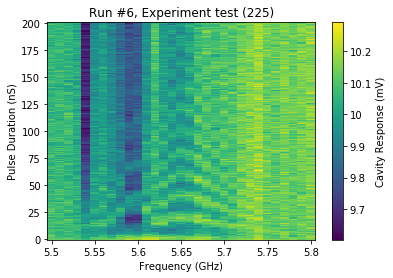

In [9]:
plot_by_id(6)